# 1. Import libraries

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer

import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
nltk.download("wordnet")
from nltk.stem import WordNetLemmatizer
nltk.download("punkt")
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer

[nltk_data] Downloading package stopwords to /home/raedin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/raedin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/raedin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# 2. Load Dataset

In [22]:
df = pd.read_csv("./cyberbullying_tweets.csv")
df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [23]:
df.shape

(47692, 2)

#. 3. Clean Dataset

In [24]:
df.isna().any()

tweet_text            False
cyberbullying_type    False
dtype: bool

In [25]:
df.nunique()

tweet_text            46017
cyberbullying_type        6
dtype: int64

# 4. Visualizing Dataset

In [26]:
df['cyberbullying_type'].value_counts()

religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: cyberbullying_type, dtype: int64

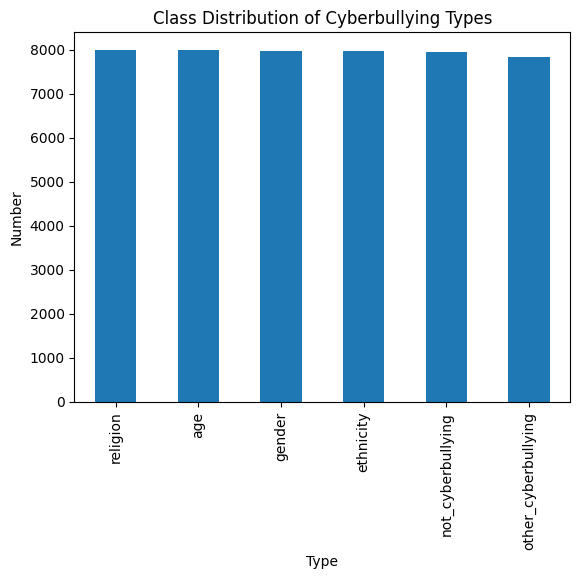

In [27]:
# Class distribution
class_distribution = df['cyberbullying_type'].value_counts()
class_distribution.plot(kind='bar')
plt.xlabel("Type")
plt.ylabel("Number")
plt.title("Class Distribution of Cyberbullying Types")
plt.show()

In [28]:
from collections import Counter
import re
import string

In [29]:
long_string = " ".join(df['tweet_text'].values)

# Remove URLs, mentions, and hashtags
long_string = re.sub(r'http\S+', '', long_string)
long_string = re.sub(r'@\S+', '', long_string)
long_string = re.sub(r'#\S+', '', long_string)

# Split into individual words
words = long_string.split()

 # Remove stopwords
stop_words = set(stopwords.words('english'))
words = [word for word in words if not word in stop_words]

In [30]:
word_count = Counter(words)
word_freq = word_count.most_common(50)
word_freq

[('I', 16040),
 ('school', 6681),
 ('like', 5249),
 ('high', 4645),
 ('dumb', 4387),
 ('bullied', 4266),
 ('RT', 4196),
 ('people', 3792),
 ('u', 3241),
 ('rape', 3021),
 ('fuck', 3019),
 ('one', 2786),
 ('bully', 2725),
 ('gay', 2686),
 ('&amp;', 2599),
 ('The', 2523),
 ('get', 2504),
 ('You', 2477),
 ('nigger', 2441),
 ('ass', 2438),
 ('girls', 2379),
 ("I'm", 2324),
 ('girl', 2274),
 ('jokes', 2070),
 ('know', 2022),
 ('think', 1958),
 ('would', 1955),
 ('black', 1869),
 ('white', 1641),
 ('got', 1602),
 ('say', 1511),
 ('make', 1506),
 ('FUCK', 1497),
 ('call', 1480),
 ('even', 1441),
 ('Muslim', 1421),
 ('called', 1421),
 ('And', 1393),
 ('Muslims', 1386),
 ('-', 1372),
 ('never', 1333),
 ('see', 1329),
 ('ur', 1309),
 ('still', 1305),
 ('go', 1299),
 ('This', 1289),
 ('want', 1277),
 ('A', 1263),
 ('fucking', 1261),
 ('really', 1208)]

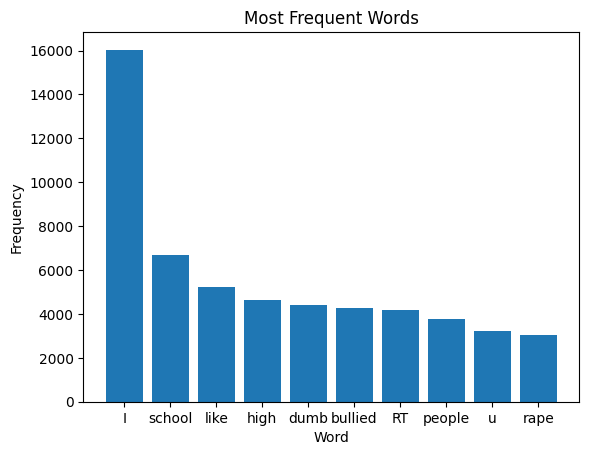

In [31]:
# Bar chart to display commmon words
word_freq = word_count.most_common(10)
x_word = [word[0] for word in word_freq]
y_freq = [word[1] for word in word_freq]
plt.bar(x_word, y_freq)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Most Frequent Words')
plt.show()

In [32]:
from wordcloud import WordCloud

In [16]:
long_string = " ".join([word for word in df['tweet_text']])
font_file = "/home/raedin/Downloads/07558_CenturyGothic.ttf"
# font = wordcloud.F
wc = WordCloud(max_words=500, width=1600, height=800, font_path=font_file).generate(long_string)
plt.figure(figsize=(20, 15))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Most Frequent Words", fontsize=19)
plt.show()

ValueError: Only supported for TrueType fonts

# 5. Preprocessing

In [33]:
def preprocess_text(text):

    # Remove URLs, HTML tags, mentions, and hashtags
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'<[^>]+>', '', text)
    text = re.sub('<.*?>', '', text)
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'#\S+', '', text)

    # Remove non-alphabetic characters and convert to lowercase
    text = re.sub('[^a-zA-Z]', ' ', text).lower()

    # Remove punctuation and convert to lowercase
    # table = str.maketrans('', '', string.punctuation)
    # text = [word.translate(table).lower() for word in text]

    # Tokenize the text
    tokens = word_tokenize(text)

     # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if not word in stop_words]

    # Stem the tokens
    stemmer = SnowballStemmer("english")
    tokens = [stemmer.stem(word) for word in tokens]

    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Rejoin the cleaned tokens into a string
    cleaned_text = ' '.join(tokens)

    return cleaned_text

In [34]:
from tqdm.auto import tqdm
import time

In [35]:
%%time
tqdm.pandas()
df['processed_text'] = df['tweet_text'].progress_apply(preprocess_text)
df.head()

  0%|          | 0/47692 [00:00<?, ?it/s]

CPU times: user 21.6 s, sys: 649 ms, total: 22.2 s
Wall time: 22.1 s


,tweet_text,cyberbullying_type,processed_text
0,"In other words #katandandre, your food was cra...",not_cyberbullying,word food crapilici
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,white
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,classi whore red velvet cupcak
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,meh p thank head concern anoth angri dude twitter
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,isi account pretend kurdish account like islam...


## 5.1 Feature Extraction

In [36]:
# # Tfidf Vectorizer
# tfidf_vect = TfidfVectorizer()
# X_t = tfidf_vect.fit_transform(df['processed_text'])
# y = df['cyberbullying_type']

In [37]:
from sklearn.feature_extraction.text import CountVectorizer

In [38]:
# Count Vectorizer
count_vect = CountVectorizer()
X_c = count_vect.fit_transform(df['processed_text']).toarray()
y = df['cyberbullying_type']

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
# X_train_t, X_test_t, y_train, y_test = train_test_split(X_t, y, test_size = 0.2, random_state = 42)
X_train_c, X_test_c, y_train, y_test = train_test_split(X_c, y, test_size = 0.2, random_state = 42)

# 6. Training the Model

## 6.1 Logistic Regression Model

In [41]:
# from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

In [42]:
# lgr = LogisticRegression()
# lgr.fit(X_train_t, y_train)

In [43]:
# # Evaluating model on test set
# y_pred = lgr.predict(X_test_t)
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy: ", accuracy)

In [44]:
# lgr = LogisticRegression()
# lgr.fit(X_train_c, y_train)

In [45]:
# # Evaluating model on test set
# y_pred = lgr.predict(X_test_c)
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy: ", accuracy)

## 6.2 SVC model

In [46]:
from sklearn.svm import SVC

In [47]:
# # SVC with TFIDF Vectorizer
svc = SVC(kernel='linear', C=0.2)
# svc.fit(X_train_t, y_train)

In [48]:
# # Evaluating model on test set
# y_pred = svc.predict(X_test_t)
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy: ", accuracy)

In [49]:
X_train_c

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

: 

In [36]:
# SVC with Count Vectorizer
# svc = SVC(kernel='linear', C=0.2)
svc.fit(X_train_c, y_train)

: 

: 

In [ ]:
# Evaluating model on test set
y_pred = svc.predict(X_test_c)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [ ]:
from sklearn.metrics import classification_report

precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 score: {f1:.2f}")

report = classification_report(y_test, y_pred)
print(report)